# MACHINE LEARNING FINAL PROJECT

## EUROPEAN FOLK SONG MUSIC GENERATOR MODEL BUILT USING RNN LSTM

Folk piano scores from different parts of europes were a fascinating area to study. The dataset consists of 638 songs from 12 different european countries including Italy, Netherland, Romani, Ukraine, Czechoslovakia, Switzerland, France and many others. The dataset was downloaded from KernScores at kern.humdrum.org which is a library of virtual musical scores in the Humdrum **kern** data format. 

Songs were taken and were studied by using music21, a python music library and were translated into data representing time series which is then feed into a RNN LSTM network where the machine learning model learns to predict new notes and be able to predict new notes on the basis of starting notes or a seed. RNN LSTM model was used because of the complexity of the music time series. A basic RNN model fails when lots of information has to be remembered and LSTM comes into the space solving the problem which is perfect for learning about the relations between notes, pitches, bars, rests and prolongation. 

Link to dataset: https://kern.humdrum.org/cgi-bin/browse?l=/essen/europa

## Data Preprocessing

### Loading the midi files from /Data/

In [54]:
import json
import tensorflow.keras as keras
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
from numpy import array

In [2]:

import os 
import music21 as m21


acceptable_durations = [
    0.25,
    0.5,
    0.75,
    1.0,
    1.5, 
    2.0,
    3.0,
    4.0
]

data_dir = os.getcwd() + '/KernScores/'
songs = []
count = 0
for path, subdirs, files in os.walk(data_dir):
    for file in files:
        if file[-3:] == "krn":
            song = m21.converter.parse(os.path.join(path, file))
            songs.append(song)
            count += 1
print("{} songs appended".format(count))
    

638 songs appended


In [3]:
print(len(songs))

638


In [4]:
sample_song1 = songs[500]
sample_song2 = songs[255]
sample_song3 = songs[577]
sample_song1.show('midi')
sample_song2.show('midi')
sample_song3.show('midi')

#### Helper functions

In [5]:
def check_acceptable_durations(song, acceptable_durations):
    for note in song.flat.notesAndRests:
        if note.duration.quarterLength not in acceptable_durations:
            return False
    return True

def transpose(song):
    parts = song.getElementsByClass(m21.stream.Part)
    measures_part0 = parts[0].getElementsByClass(m21.stream.Measure)
    key = measures_part0[0][4]
    if not isinstance(key, m21.key.Key):
        key = song.analyze("key")
    
    #Getting interval for transposing
    if key.mode == "major":
        interval = m21.interval.Interval(key.tonic, m21.pitch.Pitch("C"))
    elif key.mode == "minor":
        interval = m21.interval.Interval(key.tonic, m21.pitch.Pitch("A"))
        
    #Transposing by interval
    transposed_song = song.transpose(interval)
    return transposed_song

def encode_song(song, time_step = 0.25):
    encoded_song = []
    for event in song.flat.notesAndRests:
        #handle notes
        if isinstance(event, m21.note.Note):
            symbol = event.pitch.midi #midi note
        #handle rests
        elif isinstance(event, m21.note.Rest):
            symbol = "r"
    
    #convert the note/rest into time series notation
        steps = int(event.duration.quarterLength / time_step)
        for step in range(steps):
            if step == 0:
                encoded_song.append(symbol)
            else:
                encoded_song.append("_")
    encoded_song = " ".join(map(str, encoded_song))
    return encoded_song



def load_file(path):
    with open(path, "r") as fp:
        song = fp.read()
    return song


#### Enumerating over all the songs and encoding them

In [6]:
count = 0
for i, song in enumerate(songs):
    #filter songs that have non acceptable durations
    if not check_acceptable_durations(song, acceptable_durations):
        continue
    song = transpose(song)
    encoded_song = encode_song(song)
    dataset_dir = os.getcwd()+ '/Dataset/'
    save_path = os.path.join(dataset_dir, str(count))
    with open(save_path, "w") as fp:
        fp.write(encoded_song)

    count += 1
print("{} songs encoded.".format(count))

601 songs encoded.


#### Combining all individual files and storing all information in a single file

In [7]:
new_song_delimiter = "/ " * 64
single_dataset = "concatenated_dataset"
indiv_datadir = os.getcwd() + '/Dataset/'
songs1 = ''
for path, _ , files in os.walk(indiv_datadir):
    for file in files:
        file_path = os.path.join(path, file)
        with open(file_path, "r") as fp:
            song = fp.read()
        songs1 = songs1 + song + " " + new_song_delimiter
songs1 = songs1[:-1]
with open(single_dataset, "w") as fp:
    fp.write(songs1)

#### Mapping all the symbols in the single dataset to integers

In [8]:
import json
mapping = {}
songs1 = songs1.split()
all_uniq_char = list(set(songs1))

for i, symbol in enumerate(all_uniq_char):
    mapping[symbol] = i
with open("symbol_mapping.json", "w") as fp:
    json.dump(mapping, fp, indent = 4)

In [9]:
songs1

['60',
 '_',
 '_',
 '_',
 '60',
 '_',
 '_',
 '_',
 '64',
 '_',
 '_',
 '_',
 '67',
 '_',
 '_',
 '_',
 '_',
 '_',
 '69',
 '_',
 '67',
 '_',
 '_',
 '_',
 '62',
 '_',
 '_',
 '_',
 '64',
 '_',
 '_',
 '_',
 '65',
 '_',
 '_',
 '_',
 'r',
 '_',
 '_',
 '_',
 '67',
 '_',
 '67',
 '_',
 '64',
 '_',
 '_',
 '_',
 '62',
 '_',
 '_',
 '_',
 '64',
 '_',
 '_',
 '_',
 '60',
 '_',
 '_',
 '_',
 '59',
 '_',
 '_',
 '_',
 '60',
 '_',
 '64',
 '_',
 '62',
 '_',
 '_',
 '_',
 '67',
 '_',
 '_',
 '_',
 '_',
 '_',
 '70',
 '_',
 '69',
 '_',
 '_',
 '_',
 '67',
 '_',
 '_',
 '_',
 '67',
 '_',
 '65',
 '_',
 '64',
 '_',
 '60',
 '_',
 '62',
 '_',
 '_',
 '_',
 '_',
 '_',
 '_',
 '_',
 '60',
 '_',
 '_',
 '_',
 '/',
 '/',
 '/',
 '/',
 '/',
 '/',
 '/',
 '/',
 '/',
 '/',
 '/',
 '/',
 '/',
 '/',
 '/',
 '/',
 '/',
 '/',
 '/',
 '/',
 '/',
 '/',
 '/',
 '/',
 '/',
 '/',
 '/',
 '/',
 '/',
 '/',
 '/',
 '/',
 '/',
 '/',
 '/',
 '/',
 '/',
 '/',
 '/',
 '/',
 '/',
 '/',
 '/',
 '/',
 '/',
 '/',
 '/',
 '/',
 '/',
 '/',
 '/',
 '/',
 '/',
 '/',

#### Converting songs to integer

In [16]:
songs_integer = []

with open("symbol_mapping.json" , "r") as fp:
    mapping1 = json.load(fp)
for symbol in songs1:
    songs_integer.append(mapping1[symbol])
    
len(songs_integer)

115175

#### Generating training sequences

In [17]:
sequence_length = 64
'''
Take first two items, predict the third i.e input => [first_item, second_item] , target => third_item and the move each items position
by 1 and then keep repeating
'''
inputs = []
targets = []
num_sequences = len(songs_integer) - sequence_length
for i in range(num_sequences):
    inputs.append(songs_integer[i:i+sequence_length])
    targets.append(songs_integer[i + sequence_length])

    


In [18]:
uniq_char_count = len(set(songs_integer))
uniq_char_count
inputs = keras.utils.to_categorical(inputs, num_classes = uniq_char_count)
targets = np.array(targets)


In [19]:
inputs.shape

(115111, 64, 37)

In [20]:
targets.shape

(115111,)

In [21]:
inputs

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

In [22]:
targets

array([18, 24, 19, ..., 20, 20, 20])

## Training the model

#### Model

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(inputs, targets, test_size = 0.2, random_state = 42)
    

In [24]:
lstm_model = keras.models.Sequential()
lstm_model.add(keras.layers.Input(shape = (None, 37)))
lstm_model.add(keras.layers.LSTM(units = 256))
lstm_model.add(keras.layers.Dropout(0.2))
lstm_model.add(keras.layers.Dense(units = 125, activation = "softmax"))
lstm_model.compile(optimizer = keras.optimizers.Adam(learning_rate = 0.001), loss = "sparse_categorical_crossentropy", metrics = ["accuracy"] )
lstm_model.summary()

2022-04-24 16:32:44.618973: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2022-04-24 16:32:44.619025: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (sergeant714): /proc/driver/nvidia/version does not exist
2022-04-24 16:32:44.620212: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 256)               301056    
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense (Dense)               (None, 125)               32125     
                                                                 
Total params: 333,181
Trainable params: 333,181
Non-trainable params: 0
_________________________________________________________________


In [40]:
#Fitting our data

In [26]:
fit = lstm_model.fit(X_train, y_train,validation_data=(X_val, y_val), epochs = 50, batch_size=64)

Epoch 1/50


2022-04-24 16:34:44.915478: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 872257536 exceeds 10% of free system memory.


1439/1439 [==============================] - 163s 112ms/step - loss: 0.9055 - accuracy: 0.7719 - val_loss: 0.7217 - val_accuracy: 0.7782
Epoch 2/50
1439/1439 [==============================] - 190s 132ms/step - loss: 0.6724 - accuracy: 0.7895 - val_loss: 0.6499 - val_accuracy: 0.7944
Epoch 3/50
1439/1439 [==============================] - 190s 132ms/step - loss: 0.6377 - accuracy: 0.7978 - val_loss: 0.6337 - val_accuracy: 0.7958
Epoch 4/50
1439/1439 [==============================] - 191s 133ms/step - loss: 0.6096 - accuracy: 0.8046 - val_loss: 0.6081 - val_accuracy: 0.8053
Epoch 5/50
1439/1439 [==============================] - 190s 132ms/step - loss: 0.6071 - accuracy: 0.8050 - val_loss: 0.6152 - val_accuracy: 0.8007
Epoch 6/50
1439/1439 [==============================] - 190s 132ms/step - loss: 0.5842 - accuracy: 0.8121 - val_loss: 0.5835 - val_accuracy: 0.8138
Epoch 7/50
1439/1439 [==============================] - 190s 132ms/step - loss: 0.5663 - accuracy: 0.8192 - val_loss: 0.581

In [27]:
lstm_model.save("complete_model.h5")

In [39]:
test_evaluation = lstm_model.evaluate(X_val, y_val)

720/720 [==============================] - 16s 23ms/step - loss: 0.7886 - accuracy: 0.8342


#### Training set accuracy : 94
#### Testing set accuracy: 83

## Learning curve for the RNN LSTM model

In [ ]:
history = fit.history

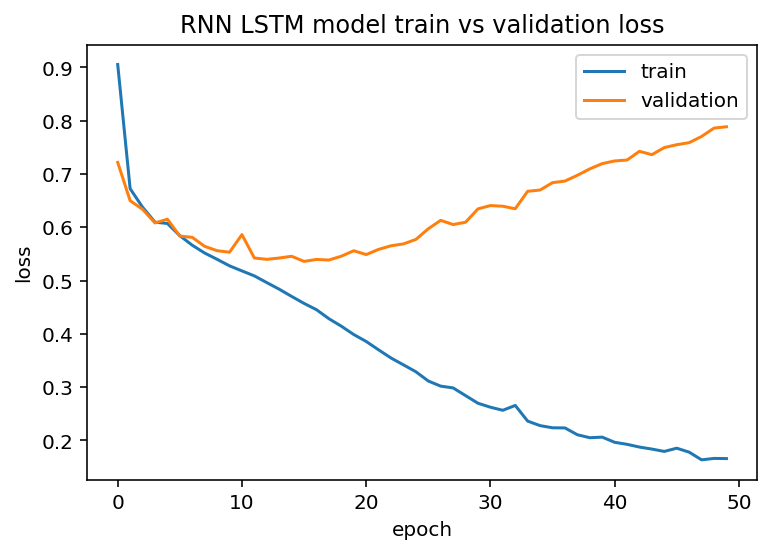

In [37]:

plt.plot(history['accuracy'])
plt.plot(history['val_loss'])
plt.title('RNN LSTM model train vs validation loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

In [91]:
history


{'loss': [0.905464768409729,
  0.6724433302879333,
  0.6377118825912476,
  0.6095988154411316,
  0.6071190237998962,
  0.5842157602310181,
  0.5663146376609802,
  0.5516654849052429,
  0.5398988723754883,
  0.5276533365249634,
  0.5181353688240051,
  0.5087723135948181,
  0.49618256092071533,
  0.4837951064109802,
  0.47026145458221436,
  0.45714226365089417,
  0.44534799456596375,
  0.4284430146217346,
  0.4143872857093811,
  0.39874520897865295,
  0.38576021790504456,
  0.37002116441726685,
  0.35469523072242737,
  0.3418542146682739,
  0.3289339244365692,
  0.31152811646461487,
  0.3019004762172699,
  0.2985694706439972,
  0.28415411710739136,
  0.2698018550872803,
  0.26235726475715637,
  0.25660496950149536,
  0.2656836211681366,
  0.2362823188304901,
  0.22780796885490417,
  0.22374217212200165,
  0.2235196977853775,
  0.21068893373012543,
  0.2051234245300293,
  0.2062201052904129,
  0.19653911888599396,
  0.1927093118429184,
  0.1875726580619812,
  0.1838005781173706,
  0.17940

## Post Processing

In [118]:
def output_melody(seed):
    start_symbols = ["/"] * 64

    temperature = 0.7
    seed = seed.split()
    melody = seed
    seed = start_symbols + seed
    #mapping seed to int
    seed = [mapping[symbol] for symbol in seed]

    for _ in range(500):
        seed = seed[-500:]
        onehot_seed = keras.utils.to_categorical(seed, num_classes = len(mapping))
        onehot_seed = onehot_seed[np.newaxis, ...]

        #Prediction
        probabilities = lstm_model.predict(onehot_seed)[0]
        predictions = np.log(probabilities)/ temperature
        probabilities = np.exp(predictions)/ np.sum(np.exp(predictions))

        choices = range(len(probabilities))
        output_unit = np.random.choice(choices, p = probabilities)
        seed.append(output_unit)
        output_symbol = [k for k, v in mapping.items() if v == output_unit][0]
        if output_symbol == "/":
            break
        melody.append(output_symbol)
    return melody

def output_midi(format, file_name, melody):
    step_duration = 0.25

    #Create midi using music 21 stream while creating notes and rests with the help of values in melody
    stream = m21.stream.Stream()

    start_symbol = None
    #Midi note or a rest

    step_counter = 1

    for i,symbol in enumerate(melody):

        #Incase NOTE/REST
        if (symbol != "_") or(i +1 == len(melody)):
            if start_symbol is not None:
                qualen_duration = step_duration + step_counter

                if start_symbol == "r":
                    m21.event = m21.note.Rest(quarterLength = qualen_duration)


                else:
                    m21.event = m21.note.Note(int(start_symbol), quarterLength = qualen_duration)
                stream.append(m21.event)

                # Reset step counter
                step_counter = 1
            start_symbol = symbol

        #Incase PROLONGATION("_")
        else:
            step_counter += 1


    stream.write(format, file_name)
    return stream



In [119]:
seed1 = '72 _ _ _ _ 77 _ _ 72 _ 48 r r'
melody1 = output_melody(seed1)
a = output_midi('midi', "ai_music2.midi", melody1)

In [129]:
seed2 = '72 _ 67 _ _ 64 _ 65 __ 48 __ 77__'
melody2 = output_melody(seed2)
a1 = output_midi('midi', "ai_music3.midi", melody2)

In [3]:
###Run these to get songs already generated by the model 
import music21 as m21
import os
song1 = m21.converter.parse(os.path.join(os.getcwd(), "ai_music2.midi"))
song2 = m21.converter.parse(os.path.join(os.getcwd(), "ai_music3.midi"))

In [4]:
song1.show('midi')

In [5]:
song2.show('midi')